In [81]:
!mkdir RegressionFolder data

mkdir: RegressionFolder: File exists
mkdir: data: File exists


In [82]:
import pandas as pd

In [103]:
df2 = pd.read_csv ('RegressionFolder/EU_CO2.csv')

df2

,TIME,1995,Unnamed: 2,1996,Unnamed: 4,1997,Unnamed: 6,1998,Unnamed: 8,1999,...,Unnamed: 40,2015,Unnamed: 42,2016,Unnamed: 44,2017,Unnamed: 46,2018,Unnamed: 48,2019
0,GEO (Labels),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,European Union - 27 countries (from 2020),"420,635.67",NaN,"422,294.44",NaN,"420,828.07",NaN,"418,677.38",NaN,"417,110.54",...,NaN,"390,318.89",NaN,"391,361.43",NaN,"394,033.28",NaN,"390,089.16",NaN,"385,786.96"
2,European Union - 28 countries (2013-2020) and ...,"468,756.24",NaN,"471,260.77",NaN,"469,112.86",NaN,"467,171",NaN,"465,627.98",...,NaN,"432,983.71",NaN,"433,811.23",NaN,"436,945.02",NaN,"432,410.96",NaN,"428,537.31"
3,European Union - 28 countries (2013-2020),"467,691.62",NaN,"470,200.76",NaN,"468,048.41",NaN,"466,086.73",NaN,"464,537.34",...,NaN,"432,006.72",NaN,"432,829.39",NaN,"435,960.82",NaN,"431,462.42",NaN,"427,601.91"
4,Belgium,"11,635.46",NaN,"11,553.3",NaN,"11,557.33",NaN,"11,348.13",NaN,"11,543.25",...,NaN,"9,567.24",NaN,"9,424.98",NaN,"9,516.97",NaN,"9,378.09",NaN,"9,369.72"
5,Bulgaria,"5,759.75",NaN,"5,464.63",NaN,"5,505.96",NaN,"4,963.01",NaN,"5,295.66",...,NaN,"6,089.34",NaN,"6,438.02",NaN,"6,408.97",NaN,"6,259.97",NaN,"6,249.25"
6,Czechia,"9,479.75",NaN,"9,173.87",NaN,"8,801.4",NaN,"8,450.06",NaN,"8,484.06",...,NaN,"8,741.21",NaN,"8,781.53",NaN,"8,726.13",NaN,"8,490.15",NaN,"8,198.66"
7,Denmark,"12,463.86",NaN,"12,055.91",NaN,"12,056.7",NaN,"12,039.57",NaN,"11,664.81",...,NaN,"10,793.63",NaN,"10,956.65",NaN,"11,039.01",NaN,"10,881.36",NaN,"10,897.64"
8,Germany (until 1990 former territory of the FRG),"65,996.35",NaN,"66,631.12",NaN,"65,804.94",NaN,"66,317.6",NaN,"66,699.56",...,NaN,"66,075.15",NaN,"65,581.86",NaN,"64,684.91",NaN,"62,487.32",NaN,"61,838.92"
9,Estonia,"1,373.8",NaN,"1,271.84",NaN,"1,281.39",NaN,"1,304.12",NaN,"1,132.41",...,NaN,"1,433.83",NaN,"1,386.94",NaN,"1,431.02",NaN,"1,420.49",NaN,"1,496.87"


In [189]:
##6th dataset: EU CO2e emissions from agriculture 1995-2019
##download this data: https://docs.google.com/spreadsheets/d/1UKMLkMy0wzB2KcCVUztSgBRqQzmICUFz/edit#gid=1056010887 
##extract row where “GEO (Labels)” = “European Union - 28 countries (2013-2020)”
##might need to remove commas 
##transpose data points so they are vertical by year 

european_co2 = df2.iloc[3] 
european_co2_clean = european_co2.dropna()
european_co2_clean.replace(',', '', regex=True, inplace = True)

european_co2_clean

##Get the Co2 value by years
co2_data = pd.to_numeric(european_co2_clean[1:])
co2_data

co2_datas = pd.Series(co2_data).values
co2_datass = co2_datas.reshape(1,-1)

co2_datass

array([[467691.62, 470200.76, 468048.41, 466086.73, 464537.34, 458435.05,
        454198.74, 446423.25, 442651.31, 441717.8 , 436505.36, 432161.5 ,
        435461.2 , 431105.75, 426044.45, 422116.49, 421130.88, 420783.63,
        423470.03, 430875.82, 432006.72, 432829.39, 435960.82, 431462.42,
        427601.91]])

In [83]:
df = pd.read_csv ('RegressionFolder/Indicators Financing.csv')

In [84]:
df

,Indicator Type,Indicator Category,Indicator Name,Sub-indicator Name,Sub-indicator Parameter,Sub-indicator Unit,Indicator Code,Member State Code,Member State Name,Time Period,Data,Flag
0,Output_Pillar I,Direct payments,OID_00 Direct payments (DP),Expenditure direct payments,Total,euro,OID_00_4,AT,Austria,2018,6.911133e+08,NaN
1,Output_Pillar I,Direct payments,OID_01 Basic Payment Scheme (BPS),Expenditure Basic Payment Scheme,Total,euro,OID_01_3,AT,Austria,2018,4.516330e+08,NaN
2,Output_Pillar I,Direct payments,OID_05 Greening,Expenditure greening,Total,euro,OID_05_4,AT,Austria,2018,2.009160e+08,NaN
3,Output_Pillar I,Direct payments,OID_12 Payment for young farmers,Expenditure young farmers,Total,euro,OID_12_3,AT,Austria,2018,1.346078e+07,NaN
4,Output_Pillar I,Direct payments,OID_13 Small farmers' scheme,Expenditure small farmers,Total,euro,OID_13_3,AT,Austria,2018,6.499798e+06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5127,Output_Pillar II,Rural Development,OIR_01 Total public expenditure,total EU expenditure under Priority 2,EU funds,euro,OIR_01b_1.1,UK,United Kingdom,2016,3.562862e+07,NaN
5128,Output_Pillar II,Rural Development,OIR_01 Total public expenditure,total EU expenditure under Priority 3,EU funds,euro,OIR_01b_1.2,UK,United Kingdom,2016,1.464588e+07,NaN
5129,Output_Pillar II,Rural Development,OIR_01 Total public expenditure,total EU expenditure under Priority 4,EU funds,euro,OIR_01b_1.3,UK,United Kingdom,2016,4.098199e+08,NaN
5130,Output_Pillar II,Rural Development,OIR_01 Total public expenditure,total EU expenditure under Priority 5,EU funds,euro,OIR_01b_1.4,UK,United Kingdom,2016,1.820389e+07,NaN


In [85]:
##extract rows where “member state name” = “European Union 28” 

european_union_28 = df[df["Member State Name"] == "European Union 28"]

In [86]:
european_union_28

,Indicator Type,Indicator Category,Indicator Name,Sub-indicator Name,Sub-indicator Parameter,Sub-indicator Unit,Indicator Code,Member State Code,Member State Name,Time Period,Data,Flag
1962,Output_Pillar I,Direct payments,OID_00 Direct payments (DP),Expenditure coupled payments,Total,billion euro,OID_00_3a,EU-28,European Union 28,1995,24.959,V
1963,Output_Pillar I,Direct payments,OID_00 Direct payments (DP),Expenditure decoupled payments,Total,billion euro,OID_00_3b,EU-28,European Union 28,1995,0.000,V
1964,Output_Pillar I,Horizontal aspects,OIH_00 Total CAP Expenditure,CAP as % EU GDP,Total,%,OIH_00_1b,EU-28,European Union 28,1995,0.610,FV
1965,Output_Pillar I,Horizontal aspects,OIH_00 Total CAP Expenditure,CAP as % of EU expenditure,Total,%,OIH_00_1c,EU-28,European Union 28,1995,55.870,FV
1966,Output_Pillar I,Market measures,OIM_00 Market Expenditure,Export refunds,Total,billion euro,OIM_00_2a,EU-28,European Union 28,1995,5.700,FV
...,...,...,...,...,...,...,...,...,...,...,...,...
2344,Output_Pillar I,Horizontal aspects,OIH_00 Total CAP Expenditure,CAP as % EU GDP,Total,%,OIH_00_1b,EU-28,European Union 28,1997,0.550,FV
2345,Output_Pillar I,Horizontal aspects,OIH_00 Total CAP Expenditure,CAP as % of EU expenditure,Total,%,OIH_00_1c,EU-28,European Union 28,1997,53.310,FV
2346,Output_Pillar I,Market measures,OIM_00 Market Expenditure,Export refunds,Total,billion euro,OIM_00_2a,EU-28,European Union 28,1997,4.820,FV
2347,Output_Pillar I,Market measures,OIM_00 Market Expenditure,Other market support,Total,billion euro,OIM_00_2b,EU-28,European Union 28,1997,6.450,FV


In [87]:
## then from these rows extract rows where “indicator category” = “direct payments”, “rural development” 
## or “horizontal aspects” 

direct_payments = european_union_28[european_union_28["Indicator Category"] == "Direct payments"]
rural_development = european_union_28[european_union_28["Indicator Category"] == "Rural Development"]
horizontal_aspects = european_union_28[european_union_28["Indicator Category"] == "Horizontal aspects"]

direct_rural = direct_payments.append(rural_development)
direct_rural_hori = direct_payments.append(horizontal_aspects)

final_dataset = direct_rural_hori

In [88]:
final_dataset

,Indicator Type,Indicator Category,Indicator Name,Sub-indicator Name,Sub-indicator Parameter,Sub-indicator Unit,Indicator Code,Member State Code,Member State Name,Time Period,Data,Flag
1962,Output_Pillar I,Direct payments,OID_00 Direct payments (DP),Expenditure coupled payments,Total,billion euro,OID_00_3a,EU-28,European Union 28,1995,2.495900e+01,V
1963,Output_Pillar I,Direct payments,OID_00 Direct payments (DP),Expenditure decoupled payments,Total,billion euro,OID_00_3b,EU-28,European Union 28,1995,0.000000e+00,V
1969,Output_Pillar I,Direct payments,OID_00 Direct payments (DP),Expenditure coupled payments,Total,billion euro,OID_00_3a,EU-28,European Union 28,2018,4.684000e+00,NaN
1970,Output_Pillar I,Direct payments,OID_00 Direct payments (DP),Expenditure decoupled payments,Total,billion euro,OID_00_3b,EU-28,European Union 28,2018,3.621300e+01,NaN
1971,Output_Pillar I,Direct payments,OID_00 Direct payments (DP),Expenditure direct payments,Total,euro,OID_00_4,EU-28,European Union 28,2018,4.133566e+10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2277,Output_Pillar I,Horizontal aspects,OIH_00 Total CAP Expenditure,CAP as % of EU expenditure,Total,%,OIH_00_1c,EU-28,European Union 28,2019,3.465000e+01,F
2315,Output_Pillar I,Horizontal aspects,OIH_00 Total CAP Expenditure,CAP as % EU GDP,Total,%,OIH_00_1b,EU-28,European Union 28,2016,3.600000e-01,F
2316,Output_Pillar I,Horizontal aspects,OIH_00 Total CAP Expenditure,CAP as % of EU expenditure,Total,%,OIH_00_1c,EU-28,European Union 28,2016,4.048000e+01,F
2344,Output_Pillar I,Horizontal aspects,OIH_00 Total CAP Expenditure,CAP as % EU GDP,Total,%,OIH_00_1b,EU-28,European Union 28,1997,5.500000e-01,FV


In [187]:
##1st dataset: Expenditure coupled payments 
##from the extracted rows with “indicator category” = “direct payments”, extract rows with “sub-indicator name” = “Expenditure coupled payments” (unit is “billion euro”)
##put these in order of “time period” from 1995-2019 

expenditure_coupled_payments = direct_payments[direct_payments["Sub-indicator Name"] == "Expenditure coupled payments"]
ascending = expenditure_coupled_payments.sort_values(by=['Time Period'], ascending=True, inplace=False)

ascending
dataset1_ascending = ascending.loc[:,'Data']

##Get the Co2 value by years
ascending_data = pd.to_numeric(dataset1_ascending[0:])
ascending_data

ascending_data2 = pd.Series(ascending_data).values
ascending_data3 = ascending_data2.reshape(1,-1)

ascending_data3 

array([[24.959, 25.653, 25.628, 25.907, 25.5  , 28.027, 28.836, 29.698,
        29.827, 32.252, 18.103,  6.677,  6.154,  6.32 ,  5.847,  3.347,
         3.214,  2.816,  2.708,  3.083,  4.509,  4.577,  4.73 ,  4.684,
         4.744]])

In [208]:
co2_datass.shape
ascending_data3.shape

(1, 25)

LinearRegression()

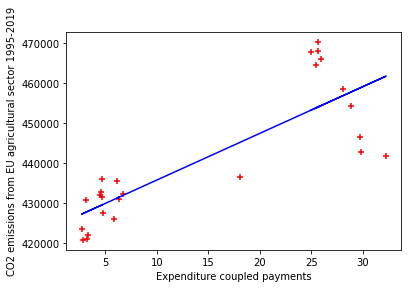

In [248]:
## Regression 1: “Expenditure coupled payments” vs “CO2 emissions from EU agricultural sector 1995-2019” 
## do a regression between the 1st dataset and the 6th dataset
## show gradient, intercept, R^2 value, MSE (if possible) and p value

## Co2_value: ascending_data2
## Expenditure_coupled_payments: co2_datas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

## Construct new dataframe
regression_1_pd = pd.DataFrame()
regression_1_pd['Expenditure coupled payments'] = ascending_data2
regression_1_pd['CO2'] = co2_datas


%matplotlib inline
plt.xlabel('Expenditure coupled payments')
plt.ylabel('CO2 emissions from EU agricultural sector 1995-2019')
plt.scatter(ascending_data2, co2_datas, color = 'red', marker = '+')
plt.plot(ascending_data2, reg.predict(regression_1_pd[['Expenditure coupled payments']]), color = 'blue')

## liear regression
reg = linear_model.LinearRegression().fit(regression_1_pd[['Expenditure coupled payments']], regression_1_pd.CO2)
reg

In [250]:
reg.predict([[15]])

array([441583.50137957])

In [251]:
reg.coef_

array([1167.4508424])

In [252]:
reg.intercept_

424071.73874351045

In [256]:
from sklearn.metrics import r2_score
import statsmodels.api as sm

## Calculating the p-value
X = regression_1_pd['Expenditure coupled payments']
y = regression_1_pd['CO2']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     48.22
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           4.45e-07
Time:                        12:34:40   Log-Likelihood:                -263.46
No. Observations:                  25   AIC:                             530.9
Df Residuals:                      23   BIC:                             533.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [283]:
##2nd dataset: Expenditure decoupled payments 
##from the extracted rows with “indicator category” = “direct payments”, extract rows with “sub-indicator name” = “Expenditure decoupled payments” (unit is “billion euro”)
##put these in order of “time period” from 1995-2019 

expenditure_decoupled_payments = direct_payments[direct_payments["Sub-indicator Name"] == "Expenditure decoupled payments"]
ascending2 = expenditure_decoupled_payments.sort_values(by=['Time Period'], ascending=True, inplace=False)

ascending2

,Indicator Type,Indicator Category,Indicator Name,Sub-indicator Name,Sub-indicator Parameter,Sub-indicator Unit,Indicator Code,Member State Code,Member State Name,Time Period,Data,Flag
1963,Output_Pillar I,Direct payments,OID_00 Direct payments (DP),Expenditure decoupled payments,Total,billion euro,OID_00_3b,EU-28,European Union 28,1995,0.000,V
2023,Output_Pillar I,Direct payments,OID_00 Direct payments (DP),Expenditure decoupled payments,Total,billion euro,OID_00_3b,EU-28,European Union 28,1996,0.000,V
2343,Output_Pillar I,Direct payments,OID_00 Direct payments (DP),Expenditure decoupled payments,Total,billion euro,OID_00_3b,EU-28,European Union 28,1997,0.000,V
2044,Output_Pillar I,Direct payments,OID_00 Direct payments (DP),Expenditure decoupled payments,Total,billion euro,OID_00_3b,EU-28,European Union 28,1998,0.000,V
2009,Output_Pillar I,Direct payments,OID_00 Direct payments (DP),Expenditure decoupled payments,Total,billion euro,OID_00_3b,EU-28,European Union 28,1999,0.000,V
2016,Output_Pillar I,Direct payments,OID_00 Direct payments (DP),Expenditure decoupled payments,Total,billion euro,OID_00_3b,EU-28,European Union 28,2000,0.000,V
2030,Output_Pillar I,Direct payments,OID_00 Direct payments (DP),Expenditure decoupled payments,Total,billion euro,OID_00_3b,EU-28,European Union 28,2001,0.000,V
2037,Output_Pillar I,Direct payments,OID_00 Direct payments (DP),Expenditure decoupled payments,Total,billion euro,OID_00_3b,EU-28,European Union 28,2002,0.000,V
2071,Output_Pillar I,Direct payments,OID_00 Direct payments (DP),Expenditure decoupled payments,Total,billion euro,OID_00_3b,EU-28,European Union 28,2003,0.000,V
2051,Output_Pillar I,Direct payments,OID_00 Direct payments (DP),Expenditure decoupled payments,Total,billion euro,OID_00_3b,EU-28,European Union 28,2004,1.449,V


In [291]:
##Regression 2: “Expenditure decoupled payments” vs “CO2 emissions from EU agricultural sector 1995-2019” 
##Do a regression between the 2nd dataset and the 6th dataset
##Show gradient, intercept, R^2 value, MSE (if possible) and p value

expan_decouple_payment = ascending2['Data']
expan_decouple_payment = pd.Series(expan_decouple_payment).values
expan_decouple_payment
expan_decouple_payments = expan_decouple_payment.reshape(1,-1)

expan_decouple_payments



array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  1.449, 15.948, 30.369, 31.414, 32.79 , 33.829, 36.831,
        37.666, 38.842, 38.952, 39.085, 36.08 , 36.549, 36.325, 36.213,
        36.19 ]])

LinearRegression()

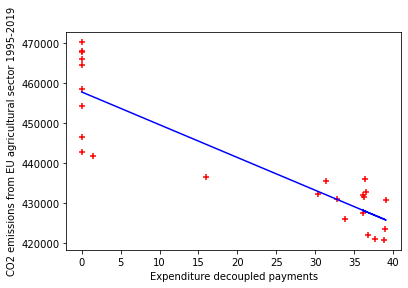

In [310]:
## Regression 2
## Construct new dataframe
regression_2_pd = pd.DataFrame()
regression_2_pd['Expenditure decoupled payments'] = expan_decouple_payment
regression_2_pd['CO2'] = co2_datas

%matplotlib inline
plt.xlabel('Expenditure decoupled payments')
plt.ylabel('CO2 emissions from EU agricultural sector 1995-2019')
plt.scatter(expan_decouple_payment, co2_datas, color = 'red', marker = '+')
plt.plot(expan_decouple_payment, reg2.predict(regression_2_pd[['Expenditure decoupled payments']]), color = 'blue')

## liear regression
reg2 = linear_model.LinearRegression().fit(regression_2_pd[['Expenditure decoupled payments']], regression_2_pd.CO2)
reg2

In [311]:
reg2.predict([[15]])

array([445482.884281])

In [312]:
reg2.coef_

array([-819.0837376])

In [313]:
reg2.intercept_

457769.1403449793

In [314]:
## Calculating the p-value
X_2 = regression_2_pd['Expenditure decoupled payments']
y_2 = regression_2_pd['CO2']
X2_2 = sm.add_constant(X_2)
est_2 = sm.OLS(y_2, X2_2)
est2_2 = est_2.fit()
print(est2_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     83.25
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           4.18e-09
Time:                        19:59:37   Log-Likelihood:                -258.46
No. Observations:                  25   AIC:                             520.9
Df Residuals:                      23   BIC:                             523.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [267]:
##3rd dataset: Expenditure direct payments 
##sum the 2 data points for each year together so we have overall expenditure on direct payments
import numpy as np

dataset3 = expenditure_decoupled_payments.append(expenditure_coupled_payments)
ascending3 = dataset3.sort_values(by=['Time Period'], ascending=True, inplace=False)
ascending3.reset_index(drop=True, inplace=True)

##ascending3.apply(ascending3["Data"].to_numeric(errors='coerce'))

##
num = []
def even_number_generator(num):
    for i in range (0,50):
        if i % 2 == 0:
            num.append((i))
    return num

num2 = []
def odd_number_generator(num2):
    for i in range (0,50):
        if i % 2 == 1:
            num2.append((i))
    return num2


ascending3

print(even_number_generator(num))
print(odd_number_generator(num2))

num2_picker = 0
## Use two functions to assign odd index value of Data to even index value (e.g. 0,2,4)
for i in num:
    ascending3.loc[i, "Data"] += ascending3.loc[num2[num2_picker], "Data"]
    num2_picker +=1

## Dropping the odd number of index
for i in num2:
    ascending3 = ascending3.drop(i, axis = 0)
    
## We got the sum of both decoupled and coupled payment

ascending3.reset_index(drop=True, inplace=True)
ascending3

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48]
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


,Indicator Type,Indicator Category,Indicator Name,Sub-indicator Name,Sub-indicator Parameter,Sub-indicator Unit,Indicator Code,Member State Code,Member State Name,Time Period,Data,Flag
0,Output_Pillar I,Direct payments,OID_00 Direct payments (DP),Expenditure decoupled payments,Total,billion euro,OID_00_3b,EU-28,European Union 28,1995,24.959,V
1,Output_Pillar I,Direct payments,OID_00 Direct payments (DP),Expenditure coupled payments,Total,billion euro,OID_00_3a,EU-28,European Union 28,1996,25.653,V
2,Output_Pillar I,Direct payments,OID_00 Direct payments (DP),Expenditure decoupled payments,Total,billion euro,OID_00_3b,EU-28,European Union 28,1997,25.628,V
3,Output_Pillar I,Direct payments,OID_00 Direct payments (DP),Expenditure coupled payments,Total,billion euro,OID_00_3a,EU-28,European Union 28,1998,25.907,V
4,Output_Pillar I,Direct payments,OID_00 Direct payments (DP),Expenditure decoupled payments,Total,billion euro,OID_00_3b,EU-28,European Union 28,1999,25.500,V
5,Output_Pillar I,Direct payments,OID_00 Direct payments (DP),Expenditure coupled payments,Total,billion euro,OID_00_3a,EU-28,European Union 28,2000,28.027,V
6,Output_Pillar I,Direct payments,OID_00 Direct payments (DP),Expenditure decoupled payments,Total,billion euro,OID_00_3b,EU-28,European Union 28,2001,28.836,V
7,Output_Pillar I,Direct payments,OID_00 Direct payments (DP),Expenditure decoupled payments,Total,billion euro,OID_00_3b,EU-28,European Union 28,2002,29.698,V
8,Output_Pillar I,Direct payments,OID_00 Direct payments (DP),Expenditure coupled payments,Total,billion euro,OID_00_3a,EU-28,European Union 28,2003,29.827,V
9,Output_Pillar I,Direct payments,OID_00 Direct payments (DP),Expenditure coupled payments,Total,billion euro,OID_00_3a,EU-28,European Union 28,2004,33.701,V


In [281]:
## Get the sum_of_data for both decoupled and coupled payments
expan_data_sum = ascending3['Data']
expan_data_sum_2 = pd.Series(expan_data_sum).values
expan_data_sum_3 = expan_data_sum_2.reshape(1,-1)

expan_data_sum_3 

array([[24.959, 25.653, 25.628, 25.907, 25.5  , 28.027, 28.836, 29.698,
        29.827, 33.701, 34.051, 37.046, 37.568, 39.11 , 39.676, 40.178,
        40.88 , 41.658, 41.66 , 42.168, 40.589, 41.126, 41.055, 40.897,
        40.934]])

LinearRegression()

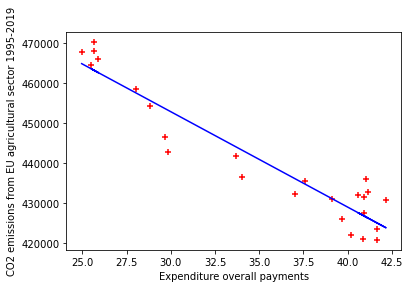

In [325]:
## Regression 3: “Expenditure direct payments” vs “CO2 emissions from EU agricultural sector 1995-2019” 
## do a regression between the 3rd dataset and the 6th dataset
## show gradient, intercept, R^2 value, MSE (if possible) and p value
## Construct new dataframe
regression_3_pd = pd.DataFrame()
regression_3_pd['Expenditure overall payments'] = expan_data_sum_2 
regression_3_pd['CO2'] = co2_datas

%matplotlib inline
plt.xlabel('Expenditure overall payments')
plt.ylabel('CO2 emissions from EU agricultural sector 1995-2019')
plt.scatter(expan_data_sum_3 , co2_datas, color = 'red', marker = '+')
plt.plot(expan_data_sum_2, reg3.predict(regression_3_pd[['Expenditure overall payments']]), color = 'blue')

## liear regression
reg3 = linear_model.LinearRegression().fit(regression_3_pd[['Expenditure overall payments']], regression_3_pd.CO2)
reg3



In [337]:
reg3.predict([[15]])

array([488599.39767106])

In [338]:
reg3.coef_

array([-2384.60254238])

In [339]:
reg3.intercept_

524368.4358067573

In [330]:
## Calculating the p-value
X_3 = regression_3_pd['Expenditure overall payments']
y_3 = regression_3_pd['CO2']
X2_3 = sm.add_constant(X_3)
est_3 = sm.OLS(y_3, X2_3)
est2_3 = est_3.fit()
print(est2_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     202.8
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           6.74e-13
Time:                        20:05:17   Log-Likelihood:                -249.03
No. Observations:                  25   AIC:                             502.1
Df Residuals:                      23   BIC:                             504.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [92]:
##4th dataset: Total CAP expenditure (covering all programming periods) 
##from the extracted rows with “indicator category” = “Rural development”, extract rows with “sub-indicator name” = “total CAP expenditure (covering all programming periods)”
##put these in order of “time period” from 1995-2019 

total_CAP_expenditure = rural_development[rural_development["Sub-indicator Name"] == "total CAP expenditure (covering all programming periods)"]
ascending4 = total_CAP_expenditure.sort_values(by=['Time Period'], ascending=True, inplace=False)

ascending4

,Indicator Type,Indicator Category,Indicator Name,Sub-indicator Name,Sub-indicator Parameter,Sub-indicator Unit,Indicator Code,Member State Code,Member State Name,Time Period,Data,Flag
1968,Output_Pillar II,Rural Development,OIR_00 Total Rural Development expenditure,total CAP expenditure (covering all programmin...,total (EU funds),billion euro,OIR_00_1,EU-28,European Union 28,1995,5.80,FV
2028,Output_Pillar II,Rural Development,OIR_00 Total Rural Development expenditure,total CAP expenditure (covering all programmin...,total (EU funds),billion euro,OIR_00_1,EU-28,European Union 28,1996,6.20,FV
2348,Output_Pillar II,Rural Development,OIR_00 Total Rural Development expenditure,total CAP expenditure (covering all programmin...,total (EU funds),billion euro,OIR_00_1,EU-28,European Union 28,1997,6.22,FV
2049,Output_Pillar II,Rural Development,OIR_00 Total Rural Development expenditure,total CAP expenditure (covering all programmin...,total (EU funds),billion euro,OIR_00_1,EU-28,European Union 28,1998,8.17,FV
2014,Output_Pillar II,Rural Development,OIR_00 Total Rural Development expenditure,total CAP expenditure (covering all programmin...,total (EU funds),billion euro,OIR_00_1,EU-28,European Union 28,1999,5.56,FV
2021,Output_Pillar II,Rural Development,OIR_00 Total Rural Development expenditure,total CAP expenditure (covering all programmin...,total (EU funds),billion euro,OIR_00_1,EU-28,European Union 28,2000,7.87,FV
2035,Output_Pillar II,Rural Development,OIR_00 Total Rural Development expenditure,total CAP expenditure (covering all programmin...,total (EU funds),billion euro,OIR_00_1,EU-28,European Union 28,2001,7.42,FV
2042,Output_Pillar II,Rural Development,OIR_00 Total Rural Development expenditure,total CAP expenditure (covering all programmin...,total (EU funds),billion euro,OIR_00_1,EU-28,European Union 28,2002,7.82,FV
2080,Output_Pillar II,Rural Development,OIR_00 Total Rural Development expenditure,total CAP expenditure (covering all programmin...,total (EU funds),billion euro,OIR_00_1,EU-28,European Union 28,2003,9.64,FV
2060,Output_Pillar II,Rural Development,OIR_00 Total Rural Development expenditure,total CAP expenditure (covering all programmin...,total (EU funds),billion euro,OIR_00_1,EU-28,European Union 28,2004,10.09,FV


In [332]:
##Regression 4: “Total CAP expenditure (covering all periods)(Rural development)” vs  “CO2 emissions from EU agricultural sector 1995-2019” 
##do a regression between the 4th dataset and the 6th dataset
##show gradient, intercept, R^2 value, MSE (if possible) and p value

cap_expenditure = ascending4['Data']
cap_expenditure_2 = pd.Series(cap_expenditure).values
cap_expenditure_3 = cap_expenditure_2.reshape(1,-1)

cap_expenditure_3 


array([[ 5.8 ,  6.2 ,  6.22,  8.17,  5.56,  7.87,  7.42,  7.82,  9.64,
        10.09, 11.33, 10.87, 10.53,  8.75, 11.49, 12.3 , 13.26, 13.16,
        11.19, 11.79, 12.37, 11.11, 12.46, 14.19, 14.59]])

LinearRegression()

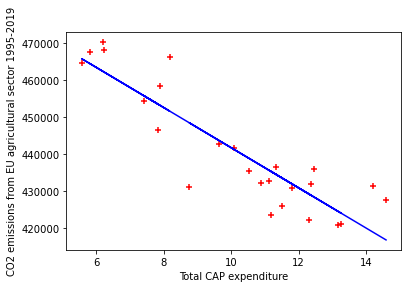

In [335]:
## Regression 4
regression_4_pd = pd.DataFrame()
regression_4_pd['Total CAP expenditure'] = cap_expenditure_2
regression_4_pd['CO2'] = co2_datas

%matplotlib inline
plt.xlabel('Total CAP expenditure')
plt.ylabel('CO2 emissions from EU agricultural sector 1995-2019')
plt.scatter(cap_expenditure_3  , co2_datas, color = 'red', marker = '+')
plt.plot(cap_expenditure_2, reg4.predict(regression_4_pd[['Total CAP expenditure']]), color = 'blue')

## liear regression
reg4 = linear_model.LinearRegression().fit(regression_4_pd[['Total CAP expenditure']], regression_4_pd.CO2)
reg4



In [340]:
reg4.predict([[15]])

array([414584.72108423])

In [341]:
reg4.coef_

array([-5420.37206501])

In [342]:
reg4.intercept_

495890.30205934256

In [93]:
##5th dataset: CAP as % of EU expenditure 
##from the extracted rows with “indicator category” = “Horizontal aspects”, extract rows with “sub-indicator name” = “CAP as % of EU expenditure”
##put these in order of “time period” from 1995-2019 

cap_as = horizontal_aspects[horizontal_aspects["Sub-indicator Name"] == "CAP as % of EU expenditure"]
ascending5 = cap_as.sort_values(by=['Time Period'], ascending=True, inplace=False)

ascending5

,Indicator Type,Indicator Category,Indicator Name,Sub-indicator Name,Sub-indicator Parameter,Sub-indicator Unit,Indicator Code,Member State Code,Member State Name,Time Period,Data,Flag
1965,Output_Pillar I,Horizontal aspects,OIH_00 Total CAP Expenditure,CAP as % of EU expenditure,Total,%,OIH_00_1c,EU-28,European Union 28,1995,55.87,FV
2025,Output_Pillar I,Horizontal aspects,OIH_00 Total CAP Expenditure,CAP as % of EU expenditure,Total,%,OIH_00_1c,EU-28,European Union 28,1996,56.14,FV
2345,Output_Pillar I,Horizontal aspects,OIH_00 Total CAP Expenditure,CAP as % of EU expenditure,Total,%,OIH_00_1c,EU-28,European Union 28,1997,53.31,FV
2046,Output_Pillar I,Horizontal aspects,OIH_00 Total CAP Expenditure,CAP as % of EU expenditure,Total,%,OIH_00_1c,EU-28,European Union 28,1998,54.04,FV
2011,Output_Pillar I,Horizontal aspects,OIH_00 Total CAP Expenditure,CAP as % of EU expenditure,Total,%,OIH_00_1c,EU-28,European Union 28,1999,52.03,FV
2018,Output_Pillar I,Horizontal aspects,OIH_00 Total CAP Expenditure,CAP as % of EU expenditure,Total,%,OIH_00_1c,EU-28,European Union 28,2000,56.60,FV
2032,Output_Pillar I,Horizontal aspects,OIH_00 Total CAP Expenditure,CAP as % of EU expenditure,Total,%,OIH_00_1c,EU-28,European Union 28,2001,53.88,FV
2039,Output_Pillar I,Horizontal aspects,OIH_00 Total CAP Expenditure,CAP as % of EU expenditure,Total,%,OIH_00_1c,EU-28,European Union 28,2002,53.23,FV
2077,Output_Pillar I,Horizontal aspects,OIH_00 Total CAP Expenditure,CAP as % of EU expenditure,Total,%,OIH_00_1c,EU-28,European Union 28,2003,47.95,FV
2057,Output_Pillar I,Horizontal aspects,OIH_00 Total CAP Expenditure,CAP as % of EU expenditure,Total,%,OIH_00_1c,EU-28,European Union 28,2004,50.17,FV


In [336]:
##Regression 5: “CAP as % of EU expenditure” vs “CO2 emissions from EU agricultural sector 1995-2019”
##Do a regression between the 5th dataset and the 6th dataset

cap_percentage = ascending5['Data']
cap_percentage_2 = pd.Series(cap_percentage).values
cap_percentage_3 = cap_percentage_2.reshape(1,-1)

cap_percentage_3 


array([[55.87, 56.14, 53.31, 54.04, 52.03, 56.6 , 53.88, 53.23, 47.95,
        50.17, 50.51, 46.97, 46.21, 46.25, 45.77, 44.13, 42.44, 40.34,
        39.97, 40.  , 41.42, 40.48, 37.11, 37.45, 34.65]])

LinearRegression()

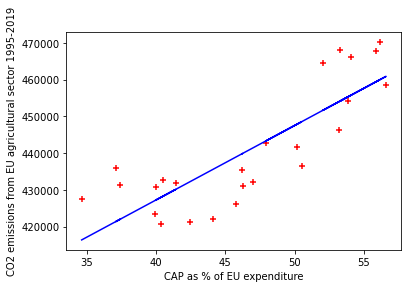

In [350]:
## Regression 5
regression_5_pd = pd.DataFrame()
regression_5_pd['CAP as % of EU expenditure'] = cap_percentage_2
regression_5_pd['CO2'] = co2_datas

%matplotlib inline
plt.xlabel('CAP as % of EU expenditure')
plt.ylabel('CO2 emissions from EU agricultural sector 1995-2019')
plt.scatter(cap_percentage_3  , co2_datas, color = 'red', marker = '+')
plt.plot(cap_percentage_2, reg5.predict(regression_5_pd[['CAP as % of EU expenditure']]), color = 'blue')

## liear regression
reg5 = linear_model.LinearRegression().fit(regression_5_pd[['CAP as % of EU expenditure']], regression_5_pd.CO2)
reg5
